# Objectives.
***
Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.



In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import wrangle

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
sns.set()

# Rules
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01,None,Orange
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,None,Ventura
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,None,Orange
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Los Angeles
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,3101.0,96451.0,0.0,1.0,1964.0,73681.0,119407.0,45726.0,1533.89,0.006940,2017-01-01,Central,Los Angeles


In [4]:
train, validate, test = wrangle.train_validate_test_split(df)

In [5]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
24350,1.5,2.0,6.0,1048.0,6111.0,34189900.0,-118882000.0,2613.0,6.111007e+07,34278.0,2061.0,96383.0,5.0,1.0,1979.0,112755.0,187920.0,75165.0,1966.50,-0.030726,2017-04-07,None,Ventura
42778,1.0,2.0,6.0,1200.0,6037.0,33952148.0,-118314946.0,4993.0,6.037238e+07,12447.0,3101.0,96028.0,0.0,1.0,1941.0,24416.0,43027.0,18611.0,700.60,-0.130763,2017-06-02,Floor/Wall,Los Angeles
22929,3.0,5.0,6.0,2724.0,6059.0,33817508.0,-118020307.0,4010.0,6.059110e+07,44833.0,1286.0,96185.0,0.0,1.0,2004.0,311439.0,760000.0,448561.0,8967.30,0.018286,2017-04-03,None,Orange
5909,4.0,7.0,6.0,3013.0,6059.0,33726046.0,-117864974.0,5990.0,6.059074e+07,47568.0,1286.0,97007.0,6.0,1.0,1924.0,184169.0,355738.0,171569.0,4316.10,0.078875,2017-01-27,None,Orange
62940,3.0,4.0,6.0,1713.0,6059.0,33727896.0,-117907475.0,7313.0,6.059075e+07,47568.0,1286.0,97004.0,0.0,1.0,2007.0,281064.0,440434.0,159370.0,5257.98,0.006582,2017-08-01,None,Orange


In [6]:
df.buildingqualitytypeid.value_counts()

6.0     32850
8.0     11335
4.0      7368
7.0      3603
5.0      1356
9.0      1065
11.0      260
3.0       131
10.0       38
12.0       15
1.0         4
2.0         3
Name: buildingqualitytypeid, dtype: int64

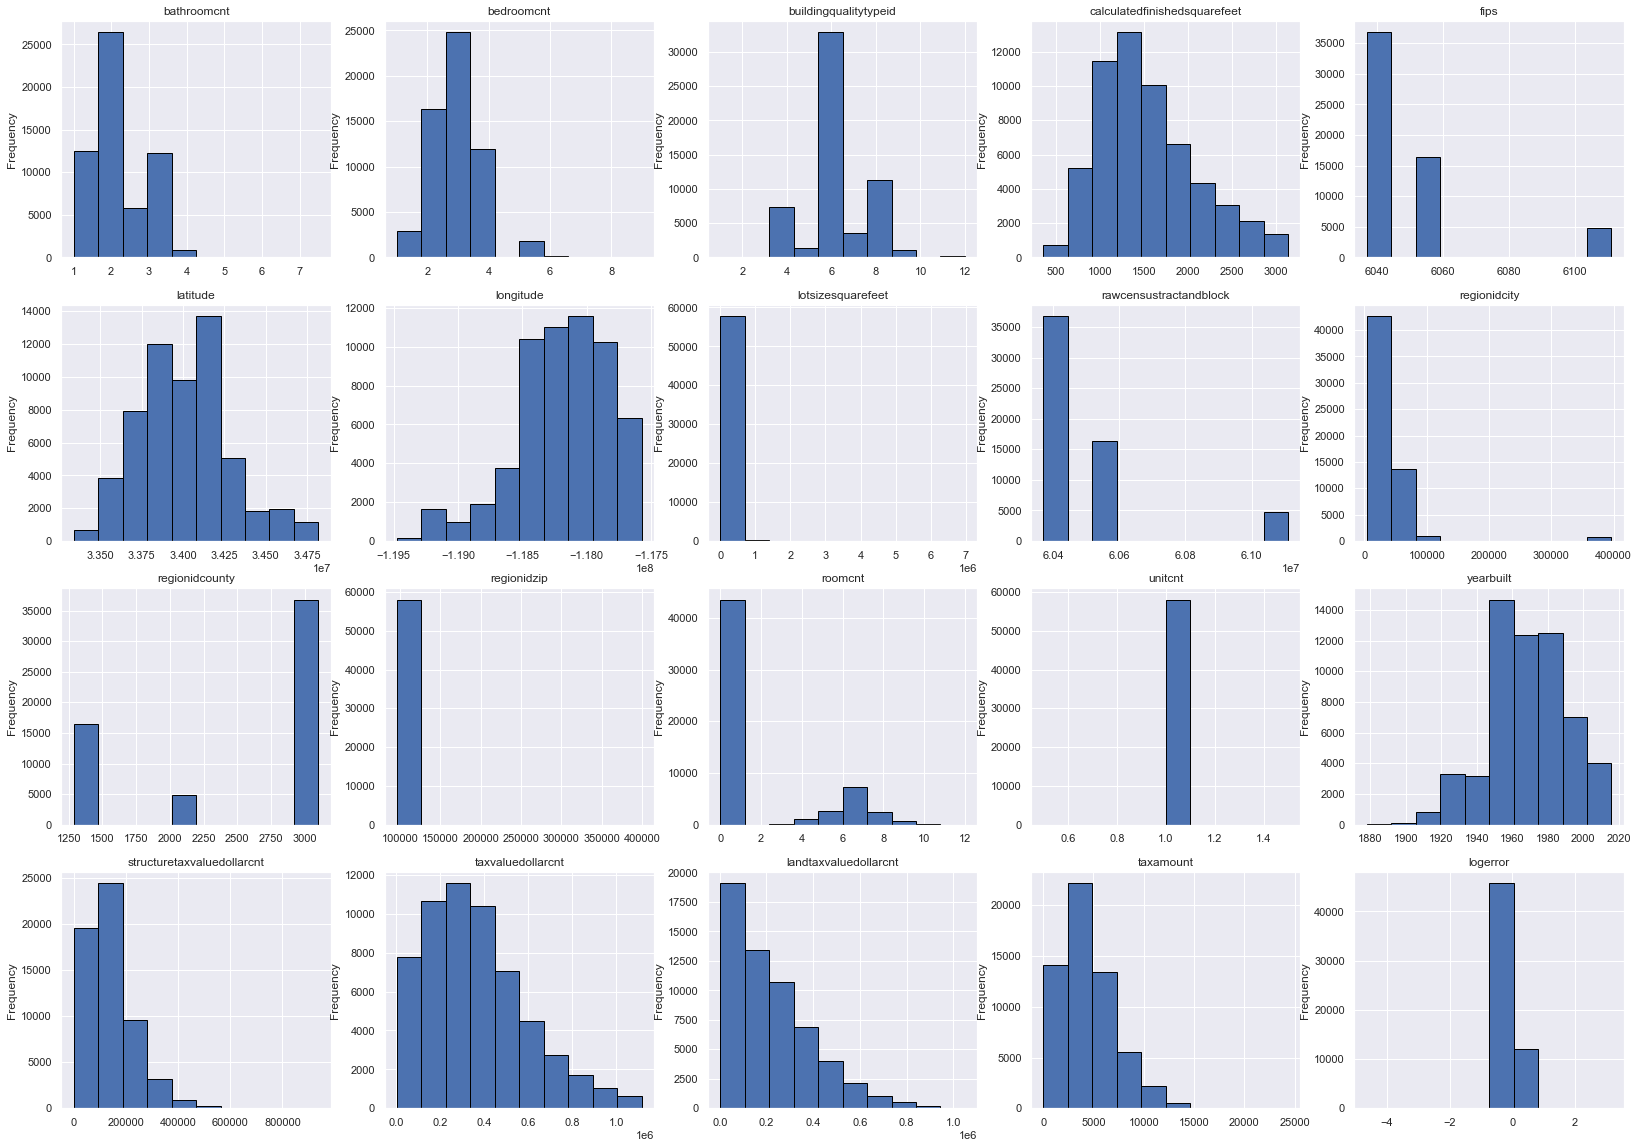

In [7]:
fig, axs = plt.subplots(4, 5, figsize=(28, 20))
axe = axs.ravel()
for i, c in enumerate(train.select_dtypes('number')):
    df[c].plot.hist(ax=axe[i],title=c, ec='black')

### Takeaways:

- Almost nothing in this data is normal, cant use statistic test that assume normal distibution.(latitude is normal but this wouldnt be appropriate to use.)
- Multiple things are under different names but represent the same data. Regionidcounty, fips. rawcensustractandblock

### Does tax value differ across zip code ?
- Does tax value differ across zip code 
- Stats test to confirm

Text(0, 0.5, 'Tax Value')

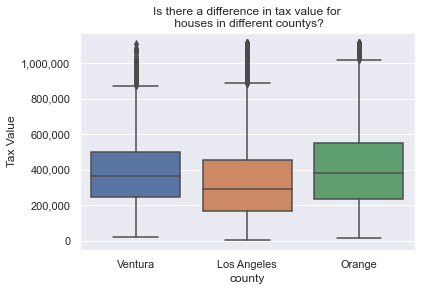

In [8]:
ax= sns.boxplot(data=train, y='taxvaluedollarcnt', x='county')
plt.title("Is there a difference in tax value for\n houses in different countys?")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.ylabel('Tax Value')

### Takeaways:
Seems like there isnt alot of difference here.Orange appears to be the more expensive, followed by Ventura and lastly Los Angeles. (this could be because we have more samples for Los Angeles we should run a staistical test.)

Levene's Test: test for equal variance

$H_0$: there is no difference in tax value variance between the two samples

$H_a$: there is a difference in tax value variance between the two samples

alpha=.05

In [9]:
stats.levene(
    df.query('county == "Los Angeles"').taxvaluedollarcnt,
    df.query('county == "Ventura"').taxvaluedollarcnt,
    df.query('county == "Orange"').taxvaluedollarcnt
)

LeveneResult(statistic=46.177488415893755, pvalue=9.147755826853863e-21)

### A low pvalue (9.147755826853863e-21) means we  reject the null hypothesis.

*The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal and does not need the normalcy of a data set that an ANOVA test would require.*

Kruskal-Wallis H-test:

$H_0$: there is no difference in tax value between the population mean of the three counties

$H_a$: there is a significant difference in tax value between the population mean of the three counties

alpha=.05

In [10]:
stats.kruskal(df.query('county == "Los Angeles"').taxvaluedollarcnt, df.query('county == "Ventura"').taxvaluedollarcnt, df.query('county == "Orange"').taxvaluedollarcnt)

KruskalResult(statistic=1536.3642261001266, pvalue=0.0)

**Reject the Null hypothesis**

We conclude there is a significant difference in tax value across zip codes.

In [11]:
df.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'transactiondate',
 'heatingorsystemdesc',
 'county']

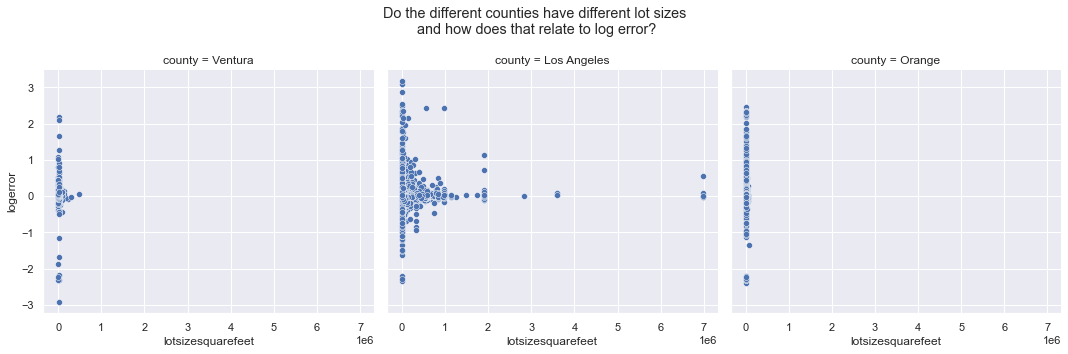

In [12]:
sns.relplot(
    data=train,
    y='logerror',
    x='lotsizesquarefeet',
    col = 'county'
)
plt.suptitle("Do the different counties have different lot sizes\n and how does that relate to log error?")
plt.tight_layout()

In [13]:
train.lotsizesquarefeet.nlargest(7, keep='first')

16575    6971010.0
66708    6971010.0
27798    6971010.0
53614    6971010.0
13679    6971010.0
65270    3589145.0
21750    3589145.0
Name: lotsizesquarefeet, dtype: float64

In [14]:
train.loc[16575]

bathroomcnt                                 2.0
bedroomcnt                                  3.0
buildingqualitytypeid                       8.0
calculatedfinishedsquarefeet             1782.0
fips                                     6037.0
latitude                             34487900.0
longitude                          -118172000.0
lotsizesquarefeet                     6971010.0
rawcensustractandblock          60379108.052051
regionidcity                            16677.0
regionidcounty                           3101.0
regionidzip                             97298.0
roomcnt                                     0.0
unitcnt                                     1.0
yearbuilt                                1990.0
structuretaxvaluedollarcnt             190100.0
taxvaluedollarcnt                      263500.0
landtaxvaluedollarcnt                   73400.0
taxamount                               3225.94
logerror                              -0.018096
transactiondate                      201

In [15]:
train.loc[66708]

bathroomcnt                                 2.0
bedroomcnt                                  3.0
buildingqualitytypeid                       8.0
calculatedfinishedsquarefeet             1228.0
fips                                     6037.0
latitude                             34487900.0
longitude                          -118172000.0
lotsizesquarefeet                     6971010.0
rawcensustractandblock          60379108.052051
regionidcity                            16677.0
regionidcounty                           3101.0
regionidzip                             97298.0
roomcnt                                     0.0
unitcnt                                     1.0
yearbuilt                                1998.0
structuretaxvaluedollarcnt              79577.0
taxvaluedollarcnt                      106101.0
landtaxvaluedollarcnt                   26524.0
taxamount                                1336.2
logerror                              -0.018106
transactiondate                      201

In [16]:
train.loc[27798]

bathroomcnt                                 2.0
bedroomcnt                                  2.0
buildingqualitytypeid                       6.0
calculatedfinishedsquarefeet             1268.0
fips                                     6037.0
latitude                             34487900.0
longitude                          -118172000.0
lotsizesquarefeet                     6971010.0
rawcensustractandblock          60379108.052051
regionidcity                            16677.0
regionidcounty                           3101.0
regionidzip                             97298.0
roomcnt                                     0.0
unitcnt                                     1.0
yearbuilt                                1996.0
structuretaxvaluedollarcnt              43670.0
taxvaluedollarcnt                      155976.0
landtaxvaluedollarcnt                  112306.0
taxamount                               1903.95
logerror                               0.089553
transactiondate                      201

In [17]:
train['loglat']=train['longitude']+train['latitude']

In [18]:
def plot_variable_dist(df, figsize = (3,2)):
    '''
    This function is for exploring. Takes in a dataframe with variables you would like to see the distribution of.
    Input the dataframe (either fully, or using .drop) with ONLY the columns you want to see plotted.
    Optional argument figsize. Default it's small. 
    BTW if you just put list(df) it pulls out only the column names
    '''
    # loop through columns and use seaborn to plot distributions
    for col in list(df):
        plt.figure(figsize=figsize)
        plt.hist(data = df, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

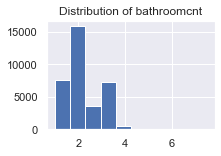

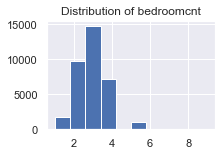

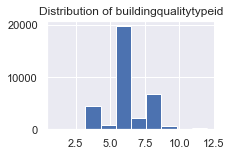

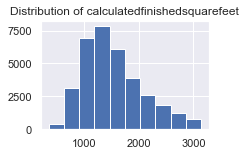

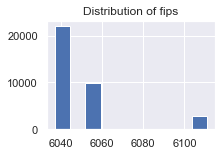

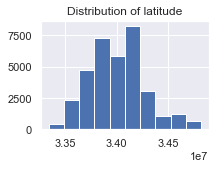

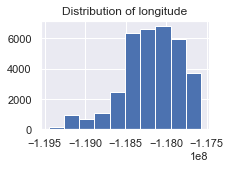

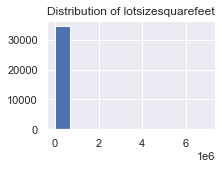

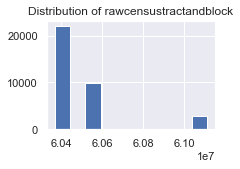

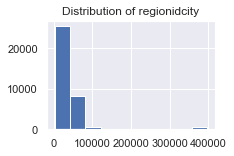

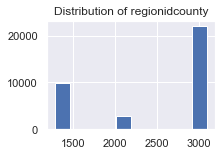

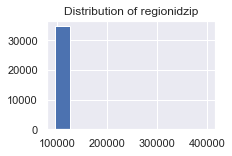

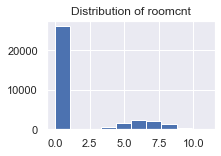

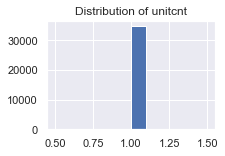

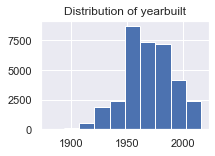

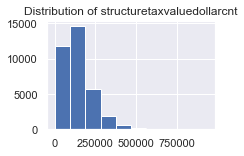

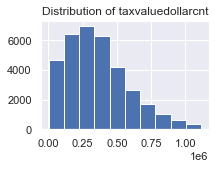

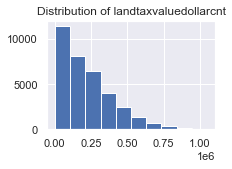

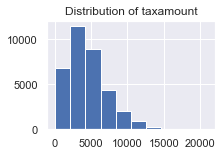

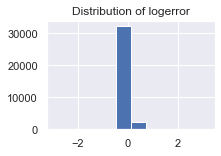

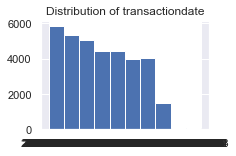

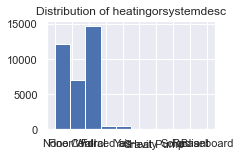

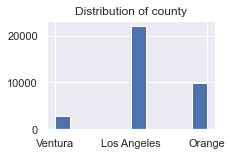

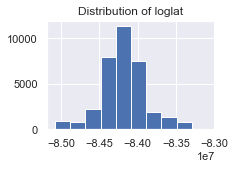

In [20]:
plot_variable_dist(train)

In [22]:
# Ideas for groups

# geographic clusters
# premium market clusters
# Do predictions vary between markets
# REmove that 160 acre property 
# Beach front proertys?
# the markets are driver for error